#Package yang Digunakan

In [1]:
#import package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Data yang Digunakan

In [ ]:
#import data dari gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
https://github.com/ekafita/DATA-MINING/blob/4a66236b301c7f5f72cbbf23061130ee224eb42f/DATA.xlsx

In [ ]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
!mkdir data
!wget -P data/ https://github.com/ekafita/DATA-MINING/blob/4a66236b301c7f5f72cbbf23061130ee224eb42f/DATA.xlsx
data = pd.read_excel('https://github.com/ekafita/DATA-MINING/blob/4a66236b301c7f5f72cbbf23061130ee224eb42f/DATA.xlsx')

--2021-12-13 15:14:36--  https://github.com/ekafita/DATA-MINING/blob/4a66236b301c7f5f72cbbf23061130ee224eb42f/DATA.xlsx
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-12-13 15:14:37 ERROR 404: Not Found.



HTTPError: ignored

In [ ]:
#definisikan data
data = pd.read_excel('/content/drive/MyDrive/JAGA DATA/DATA FIX/DATA.xlsx')

In [ ]:
data.shape

(29, 11)

In [ ]:
#menjadikan kolom/variabel provinsi sebagai index
data = data.set_index('provinsi')
data.head()

,jumlah_gratifikasi,laporan_kekayaan,manajemen_aset_daerah,optimalisasi_pajak_daerah,manajemen_asn,perizinan,pengadaan barang dan jasa,perencanaan_penganggaran_APBD,APIP,tata_kelola_dana_desa
provinsi,,,,,,,,,,
ACEH,1,94.444444,0.913278,1.872340,1.065071,0.536911,0.889354,0.805041,1.009875,0.379208
SUMATERA UTARA,25,92.307692,1.022558,1.313320,1.199450,0.538340,1.000495,0.921832,1.223571,0.392798
SUMATERA BARAT,8,91.666667,0.691020,1.110359,0.890132,0.466137,0.934580,0.925511,1.163571,0.460832
RIAU,5,84.210526,0.723602,0.904623,1.134642,0.577600,0.869697,0.889796,1.387875,0.470192
JAMBI,4,66.666667,0.898492,1.526764,0.906994,0.713629,0.982497,0.839680,1.415000,0.333772


##Standarisasi Data

In [ ]:
#Melakukan standardisasi data
scaler = StandardScaler()
data_scaler = scaler.fit_transform(data)

In [ ]:
data_scaler = pd.DataFrame(data_scaler)
data_scaler.describe()

,0,1,2,3,4,5,6,7,8,9
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,7.656711e-18,-1.148507e-15,2.526714e-16,4.058057e-16,3.368953e-16,-5.263988e-16,5.225705e-16,6.182794e-16,1.416491e-15,-4.747161e-16
std,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00
min,-6.141917e-01,-3.254766e+00,-2.479650e+00,-1.614626e+00,-1.865085e+00,-1.898749e+00,-2.350082e+00,-2.668900e+00,-1.975400e+00,-2.260331e+00
25%,-5.505789e-01,-9.132807e-02,-7.265373e-01,-8.217677e-01,-6.537639e-01,-5.984555e-01,-6.284894e-01,-5.529145e-01,-6.871952e-01,-3.277118e-01
50%,-4.233535e-01,1.346318e-01,2.183059e-01,-7.690468e-03,3.072437e-02,-2.982152e-01,1.829785e-01,3.199822e-02,-1.109142e-02,3.355955e-01
75%,2.193542e-02,6.995314e-01,5.347907e-01,6.360278e-01,6.664847e-01,6.157193e-01,8.286555e-01,6.363381e-01,8.034914e-01,6.474014e-01
max,3.711472e+00,1.490391e+00,1.630462e+00,2.384784e+00,2.486699e+00,2.813307e+00,1.707074e+00,2.261761e+00,1.683241e+00,1.443541e+00


# K-Means Clustering

##Pemilihan Jumlah Cluster

In [ ]:
#Pemilihan jumlah cluster
X = data_scaler

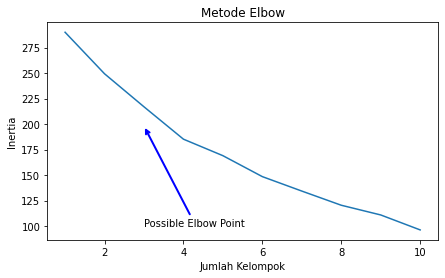

In [ ]:
#Metode elbow
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(7, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Metode Elbow')
ax.set_xlabel('Jumlah Kelompok')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 198), xytext=(3, 100), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

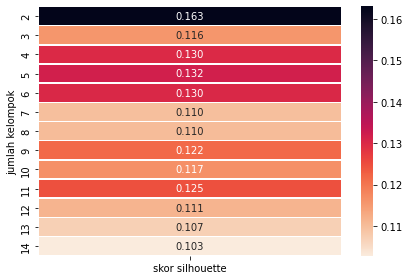

In [ ]:
#Metode silhouette

clusters_range = range(2,15)
results = []
for c in clusters_range:
  clusterer = KMeans(init='k-means++', n_clusters=c, n_init=100, random_state=0)
  clusters_labels = clusterer.fit_predict(X)
  silhouette_avg = silhouette_score(X, clusters_labels)
  results.append([c,silhouette_avg])

result = pd.DataFrame(results, columns = ["jumlah kelompok","skor silhouette"])
pivot_km = pd.pivot_table(result, index = "jumlah kelompok", values = 'skor silhouette')

plt.figure()
sns.heatmap(pivot_km, annot = True, linewidths = .5, fmt = '.3f', cmap = sns.cm.rocket_r)
plt.tight_layout()

# Hierarchical Clustering with Average Linkage

In [ ]:
# Run this cell ONLY if this notebook run from Google Colab
# Kalau dijalankan lokal (Anaconda/WinPython) maka silahkan install di terminal/command prompt 
# Lalu unduh secara manual file yang dibutuhkan dan letakkan di folder Python anda.
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

     |████████████████████████████████| 86 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 17.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=b5be6a61be7ce45dcd596c6c6ed0459e6eae771a4079c19b1e312c014d72cf13
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=5fc8aaeea47670b5d2ec66b6f1bbc3852edea824a20b6d95201a1651a5570be2
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent
--2021-12-13 14:23:51--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133

In [ ]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import time, umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import cluster, datasets
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

##Hierarchical Clustering with Average Linkage

In [ ]:
# Hierarchical http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
hierarchical = cluster.AgglomerativeClustering(n_clusters=3, linkage='average', affinity = 'euclidean')
hierarchical.fit(X) # Lambat .... dan menggunakan banyak memori O(N^2 log(N))
C_h = hierarchical.labels_.astype(np.int)
C_h[:29]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [ ]:
X.index = data.index

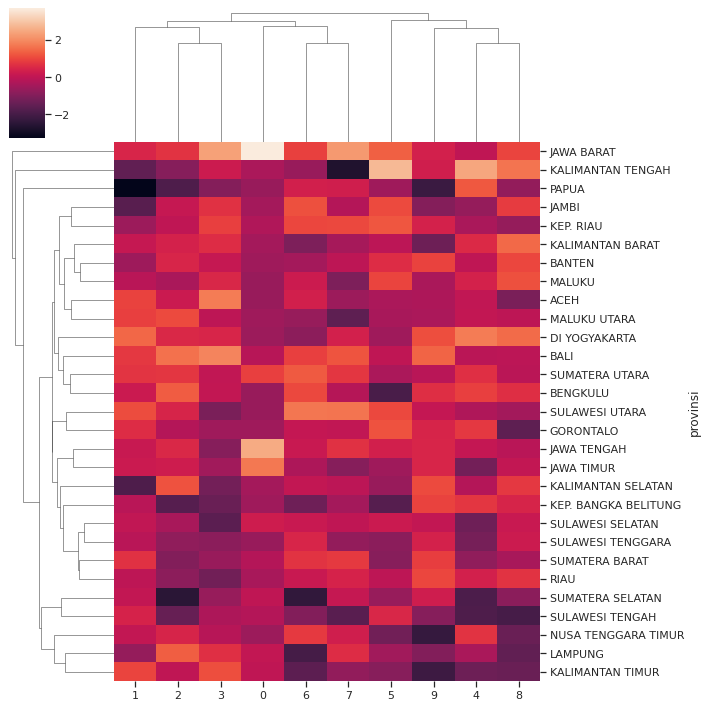

In [ ]:
# Dendogram Example
# http://seaborn.pydata.org/generated/seaborn.clustermap.html
g = sns.clustermap(X, method="average", metric="euclidean")

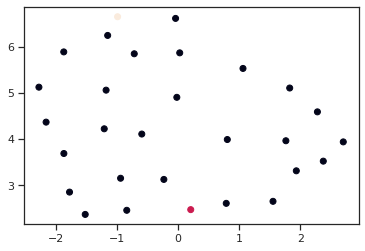

In [ ]:
# Scatter Plot of the hierarchical clustering results
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_h)
plt.show()

## Hierarchical Clustering with Ward Linkage

In [ ]:
# Hierarchical http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
hierarchical = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward', affinity = 'euclidean')
hierarchical.fit(X) # Lambat .... dan menggunakan banyak memori O(N^2 log(N))
C_h = hierarchical.labels_.astype(np.int)
C_h[:29]

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 2])

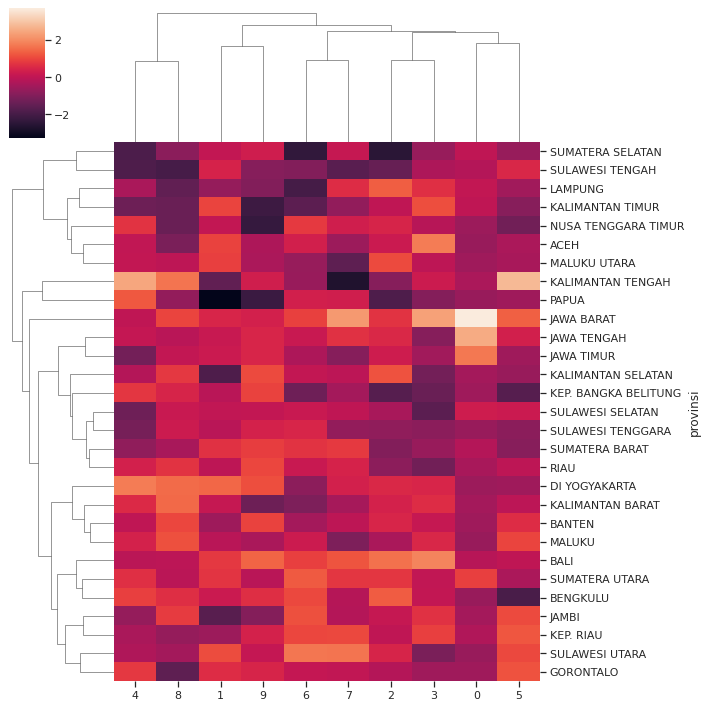

In [ ]:
# Dendogram Example
# http://seaborn.pydata.org/generated/seaborn.clustermap.html
g = sns.clustermap(X, method="ward", metric="euclidean")

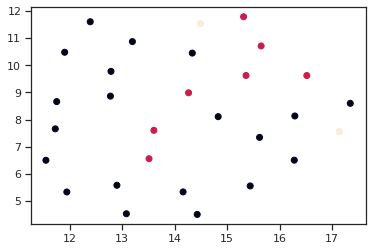

In [ ]:
# Scatter Plot of the hierarchical clustering results
X2D = umap.UMAP(n_neighbors=4, min_dist=0.80, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_h)
plt.show()

#Gaussian Clustering

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

#predictions from gmm
labels = gmm.predict(X)
frame = pd.DataFrame(data)
frame['cluster'] = labels

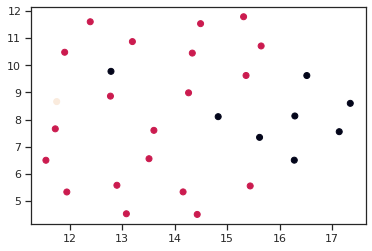

In [ ]:
# Scatter Plot of the gaussian clustering results
X2D = umap.UMAP(n_neighbors=4, min_dist=0.80, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=labels)
plt.show()

In [ ]:
#Melakukan metode elbow
#wcss = []
#for i in range(1, 11):
    #gmm = GaussianMixture(n_components = i,random_state=42)
    #gmm.fit(X)
#plt.plot(range(1, 11), wcss)
#plt.title('The Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()


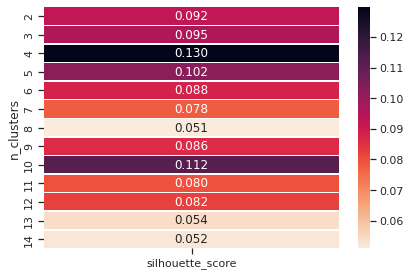

In [ ]:
#Metode silhouette

clusters_range = range(2,15)
results = []
for c in clusters_range:
  clusterer = GaussianMixture( n_components=c, n_init=100, random_state=0)
  clusters_labels = clusterer.fit_predict(X)
  silhouette_avg = silhouette_score(X, clusters_labels)
  results.append([c,silhouette_avg])

result = pd.DataFrame(results, columns = ["n_clusters","silhouette_score"])
pivot_km = pd.pivot_table(result, index = "n_clusters", values = 'silhouette_score')

plt.figure()
sns.heatmap(pivot_km, annot = True, linewidths = .5, fmt = '.3f', cmap = sns.cm.rocket_r)
plt.tight_layout()

##K-Means Clustering with 3 k

In [ ]:
#K-Means clustering
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans

array([0, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1], dtype=int32)

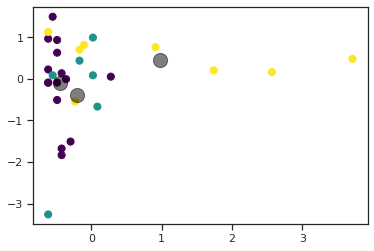

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
data['klaster'] = y_kmeans

In [ ]:
data['klaster']

provinsi
ACEH                    0
SUMATERA UTARA          2
SUMATERA BARAT          2
RIAU                    0
JAMBI                   0
SUMATERA SELATAN        1
BENGKULU                0
LAMPUNG                 1
KEP. BANGKA BELITUNG    0
KEP. RIAU               2
JAWA BARAT              2
JAWA TENGAH             2
DI YOGYAKARTA           0
JAWA TIMUR              2
BANTEN                  0
BALI                    2
NUSA TENGGARA TIMUR     1
KALIMANTAN BARAT        0
KALIMANTAN TENGAH       0
KALIMANTAN SELATAN      0
KALIMANTAN TIMUR        1
SULAWESI UTARA          2
SULAWESI TENGAH         1
SULAWESI SELATAN        0
SULAWESI TENGGARA       0
GORONTALO               0
MALUKU                  0
MALUKU UTARA            0
PAPUA                   1
Name: klaster, dtype: int32

cluster 1: sumsel, lampung, ntt, kaltim, sulteng, papua

cluster 2: sumut, jateng, jabar, jatim

cluster 0: aceh, sumbar, riau, jambi, bengkulu, babel, kepri, diy, banten, bali, kalbar, kalteng, kalsel, sulut, sulsel, sultra, gorontalo, maluku, maluku utara

In [ ]:
grouped = data.groupby(['klaster']).mean().round(5)
grouped.transpose()

klaster,0,1,2
jumlah_gratifikasi,3.73333,7.50000,26.00000
laporan_kekayaan,83.32975,80.21147,89.16989
manajemen_aset_daerah,0.87727,0.74934,0.95437
optimalisasi_pajak_daerah,1.25321,1.29129,1.38948
manajemen_asn,1.12685,0.92863,1.00350
perizinan,0.58264,0.50974,0.61489
pengadaan barang dan jasa,0.84185,0.73877,0.94349
perencanaan_penganggaran_APBD,0.81403,0.83970,0.93581
APIP,1.34828,0.97328,1.22108
tata_kelola_dana_desa,0.41679,0.30413,0.43392


In [ ]:
desc = pd.read_excel('/content/drive/MyDrive/JAGA DATA/DATA FIX/deskripsi.xlsx')

In [ ]:
desc.head()

,cluster,variabel,mean
0,1,jumlah_gratifikasi,4.00000
1,1,laporan_kekayaan,83.32975
2,1,manajemen_aset_daerah,0.87727
3,1,optimalisasi_pajak_daerah,1.25321
4,1,manajemen_asn,1.12685


In [ ]:
desc1 = desc.loc[(desc['variabel']=='jumlah_gratifikasi')|(desc['variabel']=='laporan_kekayaan')]

In [ ]:
desc1.to_excel('/content/drive/MyDrive/JAGA DATA/DATA FIX/desc1.xlsx')

In [ ]:
desc2 = desc[(desc.variabel!='jumlah_gratifikasi')&(desc.variabel!='laporan_kekayaan')]

In [ ]:
desc2.to_excel('/content/drive/MyDrive/JAGA DATA/DATA FIX/desc2.xlsx')

In [ ]:
desc1

,cluster,variabel,mean
0,1,jumlah_gratifikasi,4.00000
1,1,laporan_kekayaan,83.32975
10,2,jumlah_gratifikasi,8.00000
11,2,laporan_kekayaan,80.21147
20,3,jumlah_gratifikasi,26.00000
21,3,laporan_kekayaan,89.16989


In [ ]:
desc2

,cluster,variabel,mean
2,1,manajemen_aset_daerah,0.87727
3,1,optimalisasi_pajak_daerah,1.25321
4,1,manajemen_asn,1.12685
5,1,perizinan,0.58264
6,1,pengadaan barang dan jasa,0.84185
7,1,perencanaan_penganggaran_APBD,0.81403
8,1,APIP,1.34828
9,1,tata_kelola_dana_desa,0.41679
12,2,manajemen_aset_daerah,0.74934
13,2,optimalisasi_pajak_daerah,1.29129


Text(0.5, 1.0, 'Deskripsi Jumlah Gratifikasi dan LHKPN')

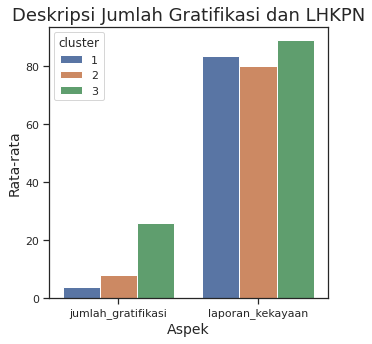

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x="variabel", 
            y="mean", 
            hue="cluster", 
            data=desc1)
plt.ylabel("Rata-rata", size=14)
plt.xlabel("Aspek", size=14)
plt.title("Deskripsi Jumlah Gratifikasi dan LHKPN", size=18)

Text(0.5, 1.0, 'Deskripsi Area Intervensi')

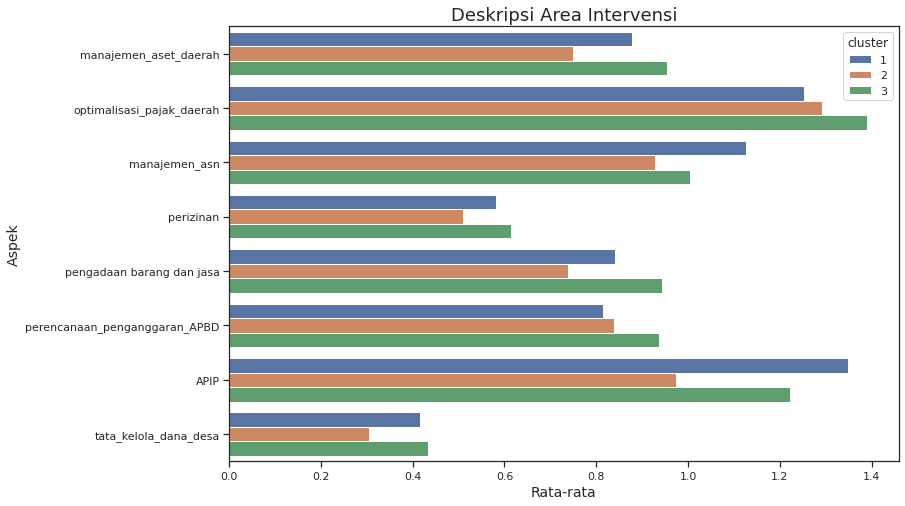

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x="mean", 
            y="variabel", 
            hue="cluster", 
            data=desc2)
plt.ylabel("Aspek", size=14)
plt.xlabel("Rata-rata", size=14)
plt.title("Deskripsi Area Intervensi", size=18)

- Tata kelola dana desa untuk seluruh cluster nilainya masih sangat kecil, terutama di cluster 2. 

- untuk nilai area intervensi, rata2 cluster 2 lebih kecil dibandingkan cluster lainnya hampir di segala aspek, namun di gratif dan lhkpn berada di tengah2

- untuk gratif dan lhkpn cluster 1 yg paling rendah

- cluster 3 itu yg rata2 nilai area intervensinya paling tinggi dibandingkan cluster lain hampir di segala aspek (cluster 3 cukup optimal dalam pelaksanaan pencegahan korupsi)
